## Tracking John

- Let's do a practical exercise to see how our data has exposed us to the digital world 
- We will analyse a week long GPS data of John to get insights about him
- This data was extracted from Jhon's google map location data

- You can request your data from Google through https://takeout.google.com/?pli=1

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime

In [ ]:
# Let's load John's GPS data
data = pd.read_csv('john_week_gps.csv')

data

In [14]:
# Code to extract the GPS coordinates based on a time frame
# time format in the dataset: 24 hour (ex: 13:53:11)

# Convert 'Time'and 'Date' string columns to correct date and time objects
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.date
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Extract the gps corrdinates within a given time range
def time_based_filter(dataset, new_file_name, start_time, end_time):
    start_time = datetime.strptime(start_time, '%H:%M:%S').time()
    end_time = datetime.strptime(end_time, '%H:%M:%S').time()
    
    # Check if the range crosses midnight
    if start_time <= end_time:
        filtered_data = dataset[(dataset['Time'] >= start_time) & (dataset['Time'] <= end_time)]
    else:
        filtered_data = dataset[(dataset['Time'] >= start_time) | (dataset['Time'] <= end_time)]

    # save to a new file so that you can visualise it in a map
    filtered_data.to_csv(f'{new_file_name}.csv', index=False)
    
# Extract Day wise GPS data
def day_filter():
    
    if not os.path.exists('Day_wise_GPS'):
        os.makedirs('Day_wise_GPS')
    
    # Get unique values from the specified column
    unique_dates = data['Date'].unique()

    # Filter and save data for each unique value
    for date in unique_dates:
        # Filter rows where the column value matches the current unique value
        filtered_data = data[data['Date'] == date]

        # Apply time range filter
        filtered_data.to_csv(f'Day_wise_GPS/{date}.csv', index =False)

 **Q1: Where is John's home?**

In [15]:
# How can you find John's home
# What time period are humans most likely to be at home
# Run the time_based_filter() funtion to extract the gps location at that time period 
# Download the new dataset "John_home.csv", right click => Download (make sure it is in CSV format) 
# Visualise the csv files in a map https://www.gpsvisualizer.com/

time_based_filter(data, 'John_home', '23:00:00', '5:00:00')

<font color="blue"> Write your answer </font>

 **Q2: What other information you can tell about John?** Work/study place, transport, workouts, etc?

In [16]:
# Run this method. It will divide the GPS data into different days
# The new files will be saved inside the Day_wise_GPS folder
# Download the new datasets, right click => Download (make sure it is in CSV format) 
# Form a group with you friends
# This time we will generate a map with speed values so we can what activities that John were doing

day_filter()

<font color="blue"> Write your answer </font>

 **Q3: What other companies can benefit from John's location data?**

<font color="blue"> Write your answer </font>

 **Q4: If John's GPS data of 10 years were given to you, what additional insights can you derive?**

<font color="blue"> Write your answer </font>

**Think : How exposed are you?** <br>
* How many years have you been digitally active (not only online, offline activities count too e.g., tapping your AT card)? <br>
* For how many applications have you given the permission to access your location? <br>
* For how long did you gave the location permission? <br>
* This exercise was only focusing location data.....Many other types of data are collected by applications.. <br>

**Instructions to visualise multiple datasets with speed, day and time labels**
 <br>
 Go to Link https://www.gpsvisualizer.com/map?uploaded_file_1=&format=leaflet&convert_format=&form=leaflet&google_api_key=
 <br>
 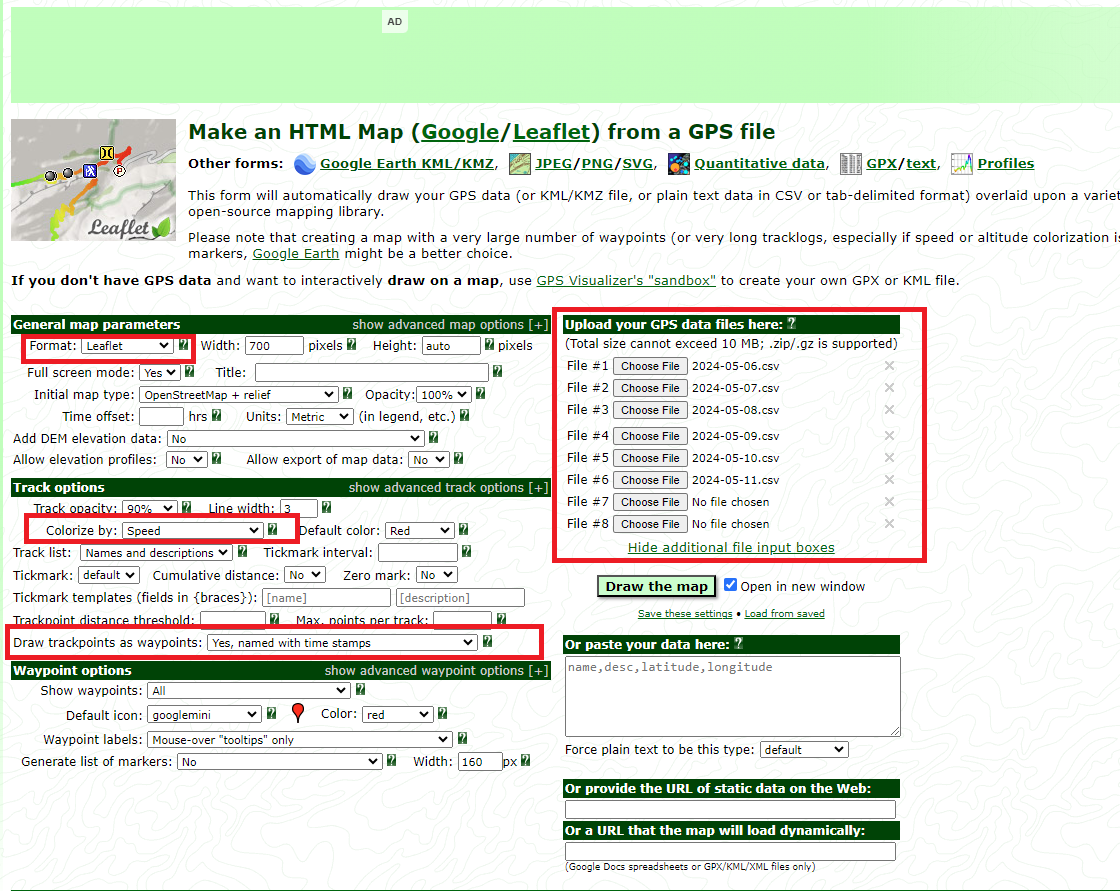


**Your map should like this..**
 <br>
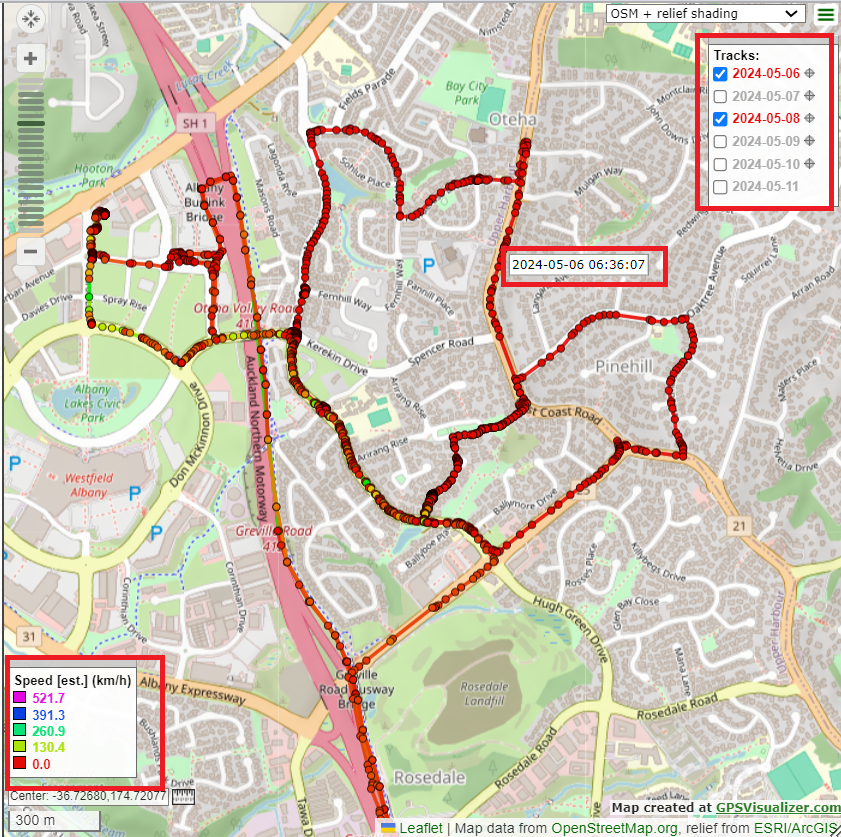